## The usual imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# And a new import - scipy's basic ODE integration function
from scipy.integrate import odeint

## Intro - The Euler Method

A first-order ordinary differential equation can be written as 
$$\frac{d y}{dt} = g(y, t)$$
The time derivative can depend on the value of $y(t)$ as well as on $t$. 

To solve a differential equation on a computer, we use a discrete approximation to the derivative
$$\frac{d y}{dt} = \frac{y_{i+1} - y_{i}}{t_{i+1} - t_{i}}$$
where we're evaluating $y$ at discrete *time steps* $t_{i}$.

We'll work with equal time steps given by $t_{i+1} - t_{i} = \tau$. The Euler method makes a simple approximation:
$$y_{i+1} = y_{i} + g_{i} \tau + O(\tau^2)$$
The last term just means that we've ignored any terms of order $\tau^2$ or higher. The bigger $\tau$ is, the bigger the error will be.

We'll see how this works by solving the equation
$$\frac{d y}{dt} = - y ~,$$
which has the solution $y(t) = A~e^{-t}$.

In [4]:
tau = 1.
yi = 1.
result1 = [(0., yi)]
for t in np.arange(tau, 6.+tau, tau):
    yi = yi + (-yi) * tau
    result1.append((t, yi))
result1 = np.array(result1)

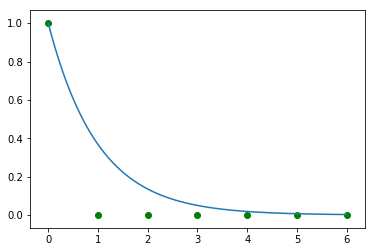

In [5]:
times = np.linspace(0.,6.,1000)
plt.plot(times, np.exp(-times))
plt.scatter(result1[:,0], result1[:,1], c='g')

**Exercise 0.1**: Make the time step above $\tau = 1.5$. What happens?

**Exercise 0.2**: Now make two new sets of results with smaller values of $\tau$ and add them to the plot. Does the solution get better?

## Ex 1 - The Decaying Exponential

Now let's start to use scipy's odeint to solve some differential equations with nice sophisticated integrators. We'll continue to solve
$$\frac{d y}{dt} = - y$$
We start by defining a function for the right-hand side.

In [6]:
# Defining the function is simple.
def f1(y, t):
    return -y

In [7]:
# We'll solve from t = 0 to t = 4, at 100 equally-spaced points.
times = np.linspace(0.,4.,100)

In [8]:
y_init1 = 1. # Starting value for y, at t = 0
yarr1 = odeint(f1, y_init1, times)

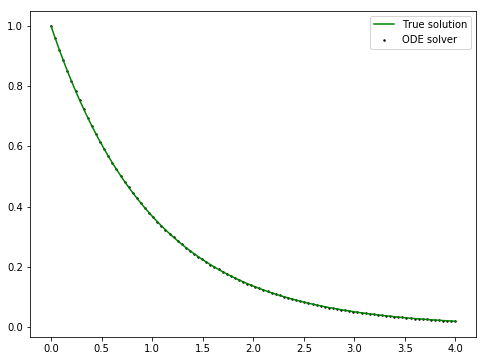

In [9]:
plt.figure(figsize=(8,6))
plt.plot(times, np.exp(-times), c='g', label='True solution')
plt.scatter(times, yarr1, s=2, c='k', label='ODE solver')
plt.legend()

**Exercise 1.1**: Can you make this decay twice as fast?

**Exercise 1.2**: Can you change the amplitude, i.e. make the solution $2 e^{-t}$ rather than $e^{-t}$?

## Ex 2 - The Sinusoid

Now let's try to get a sinusoid. We can't do that with a single derivative -- we need a second-order equation. It looks like
$$ \frac{d^2 y}{d t^2} = - \omega^2 y$$
But odeint doesn't say anything about second derivatives. How are we supposed to solve this?

The trick is, we're allowed to have many variables. So let's define a new variable
$$v_y = \frac{d y}{d t}$$

If we take another derivative, we get:
$$\frac{d v_y}{d t} = \frac{d^2 y}{d t}$$

Now we can re-write the above equation as two pieces:
$$\begin{align}
\frac{d v_y}{d t} &= -\omega^2 y \\
\frac{d y}{d t} &= v_y
\end{align}$$

We've gone from one second-order equation to two first-order equations. Our new variable is the velocity.

In [10]:
# The function now takes a vector as input.
omega = np.pi
def f2(vec, t):
    y, vy = vec
    return (vy, -omega*omega*y)

In [11]:
y_init2 = (1., 0.) # Starting value for y, vy at t = 0
yarr2 = odeint(f2, y_init2, times)

In [12]:
yarr2.shape

(100, 2)

The result now has two variables, each one is its own column. Each time is a row. We can use numpy's multi-dimensional slicing to access just the first variable by doing

yarr2\[:, 0\]

In the first slot, we put the slice operator ':' all by itself. This just means take all the data in that dimension. Then we specify that we want column zero, which is the first variable since Python counts from zero.

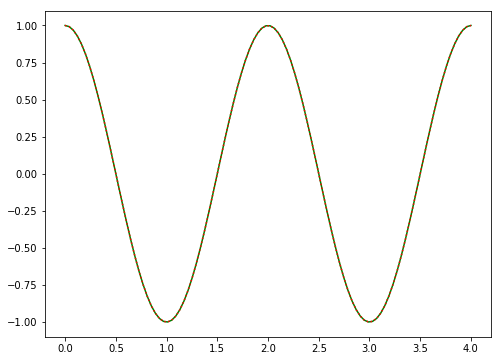

In [13]:
plt.figure(figsize=(8,6))
plt.plot(times, np.cos(omega*times), 'g')
plt.plot(times, yarr2[:,0], 'r:')

**Exercise 2.1**: How do you double the amplitude?

**Exercise 2.2**: Can you change the result in y from a cosine to a sine? Hint: A sine starts at zero, but it has some initial slope.

**Exercise 2.3**: Can you change the frequency in the same way? If not, how do you change it?

**Exercise 2.4**: Copying the example from above, can you modify the equation to add damping? The result should be a decaying sinusoid.